# 카톡 채팅 분석 1

# Data Load
---

In [1]:
f = open("C:/Users/user/Desktop/카톡대화.txt", 'r', encoding = 'utf-8')
all_chat = []
for line in f :
    all_chat.append(line.replace('\n',"")) # 엔터 없애주기
f.close() 

In [2]:
len(all_chat)

152922

In [3]:
all_chat[:10]

['신성재 님과 카카오톡 대화',
 '저장한 날짜 : 2020-02-27 01:47:43',
 '',
 '--------------- 2017년 1월 19일 목요일 ---------------',
 '[김성화] [오전 2:16] 오 팁 이만냥 받음',
 '[김성화] [오전 2:16] 재민 그동네 좀 좋네',
 '[김재민] [오전 2:19] 오',
 '[김재민] [오전 2:19] 난 카지노 3만원잃음',
 '[김재민] [오전 2:19] ㅋㅋㅋ',
 '[김성화] [오전 2:21] ㅋㅋ븅신']

# Data pre-processing
---

In [4]:
# 변수 구분
name = []
time = []
text = []
err = []
for chat in all_chat :
    temp = chat.split('] ')
    if len(temp) == 3 :
        name.append(temp[0].replace("[",""))
        time.append(temp[1].replace("[",""))
        text.append(temp[2])
    else:
        err.append(chat)

In [5]:
text[:10]

['오 팁 이만냥 받음',
 '재민 그동네 좀 좋네',
 '오',
 '난 카지노 3만원잃음',
 'ㅋㅋㅋ',
 'ㅋㅋ븅신',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '여기 한심하게돈많은놈들많더',
 '개부럽',
 'ㅋㅋㅋ그새끼들 연락처받아놔라']

In [6]:
time[:10]

['오전 2:16',
 '오전 2:16',
 '오전 2:19',
 '오전 2:19',
 '오전 2:19',
 '오전 2:21',
 '오전 2:21',
 '오전 2:21',
 '오전 2:21',
 '오전 2:22']

In [7]:
name[:10]

['김성화', '김성화', '김재민', '김재민', '김재민', '김성화', '김재민', '김재민', '김재민', '김성화']

In [8]:
# 띄워쓰기로 구분하고 합칠것
temp = " ".join(text).split(" ")

In [9]:
# 갯수 세는 패키지
from collections import Counter
count = Counter(name)
count.most_common(10)

[('김재민', 56857), ('김성화', 37108), ('곽종현🎗', 31927), ('김신기', 23316)]

In [10]:
# 리스트 요소를 나누거나 나누는 경우 zip함수
n,c = zip(*count.most_common(10))

In [11]:
n[:10]

('김재민', '김성화', '곽종현🎗', '김신기')

In [12]:
c[:10]

(56857, 37108, 31927, 23316)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

In [14]:
# 그래프 내 한글 변환
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C://Users//user/Github/NanumSquareB.ttf").get_name()
rc('font', family=font_name)

In [15]:
# 매소드 정보
?matplotlib.font_manager.FontProperties

In [16]:
# 현재 워킹 디렉토리
%pwd

'C:\\Users\\user\\Github\\Project_Kakao chat'

<function matplotlib.pyplot.show(*args, **kw)>

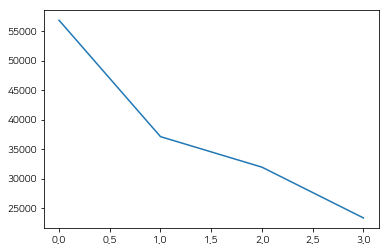

In [17]:
plt.plot(c)
plt.show

In [18]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

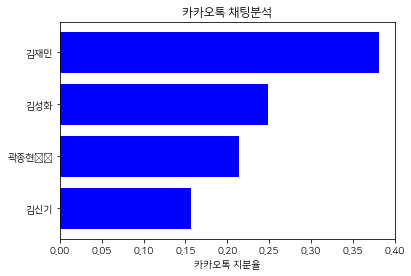

In [22]:
# 그래프 그리기
plt.figure(figsize=(6,4)) # 도화지
plt.title("카카오톡 채팅분석") # 그래프 제목

y = c
x = n
total = sum(c)

# plt.barh(-np.arange(len(x)), y, color = 'blue') # 그래프 x값 y값, 색상
# plt.yticks(-np.arange(len(x)), x) # y축 데이터 레이블
# plt.xlabel("카카오톡 채팅 수") # x축 레이블

plt.barh(-np.arange(len(x)), np.array(y)/total, color = 'b') # 그래프 x값 y값, 색상
plt.yticks(-np.arange(len(x)), x) # y축 데이터 레이블
plt.xlabel("카카오톡 지분율") # x축 레이블

#plt.show()
plt.savefig("talk share graph.png")

# 출처
---
카카오톡 대화 불러오기 - https://github.com/ssooni  
형태소 모듈 - https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/  
주피터 용량 제한 - http://bit.ly/2x2n2AC  
데이터 병합 - http://bit.ly/2IbheHg  
카카오 채팅 분석 = https://github.com/me0768/python_data/blob/master/kakaotalk/talk.py